In [1]:
import tensorflow as tf
keras = tf.keras
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# %run ../src/acc_df.py
# Ac = Acc_data('../data/cleaned/coll_coord.csv')
# acc = Ac.get_all_coll() #['']

### 1. Turn it into a time series of weeks

In [3]:
week_numbers = pd.read_csv('../../data/cleaned/weekseries_05_18.csv')

In [4]:
week_numbers.head(2),week_numbers.tail(2)

(           ds  acc_nr
 0  2005-01-02     275
 1  2005-01-09     308,              ds  acc_nr
 729  2018-12-23     234
 730  2018-12-30     150)

In [5]:
acc_nr_bw = week_numbers.acc_nr.values #[:100]
len(acc_nr_bw)

731

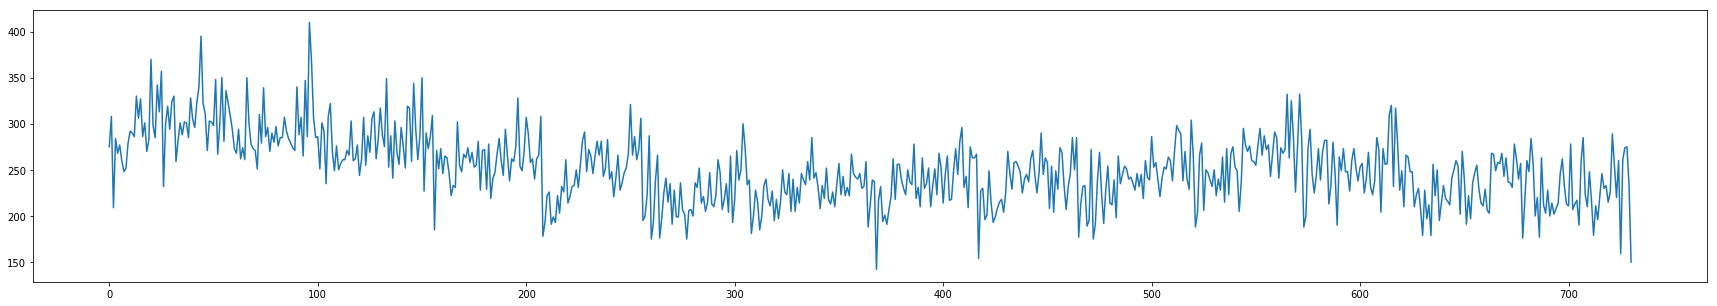

In [6]:
fig, ax = plt.subplots(figsize=(30,5))
ax.plot(week_numbers.index.values, acc_nr_bw)

#### Windowize and split

In [7]:
def windowize_data(data, n_prev):
    n_predictions = len(data) - n_prev
    y = data[n_prev:]
    # this might be too clever
    indices = np.arange(n_prev) + np.arange(n_predictions)[:, None]
    x = data[indices, None]
    return x, y

In [8]:
# windowize_data(week_numbers.index.values,20)

In [9]:
def split_and_windowize(data, n_prev, fraction_test=0.3):
    n_predictions = len(data) - 2*n_prev
    
    n_test  = int(fraction_test * n_predictions)
    n_train = n_predictions - n_test   
    
    x_train, y_train = windowize_data(data[:n_train], n_prev)
    x_test, y_test = windowize_data(data[n_train:], n_prev)
    return x_train, x_test, y_train, y_test

In [10]:
n_prev = 50
x_train, x_test, y_train, y_test = split_and_windowize(acc_nr_bw, n_prev, fraction_test=0.01)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((575, 50, 1), (56, 50, 1), (575,), (56,))

#### Model

In [25]:
model = keras.Sequential()
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, input_shape=(n_prev, 1), return_sequences=True))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.LSTM(60, return_sequences=False))
model.add(keras.layers.Dense(1, activation='relu'))
model.compile(optimizer='rmsprop',
              loss='mean_squared_error')

### Train

In [26]:
model.fit(x_train, y_train, batch_size=32, epochs=200)

Train on 575 samples
Epoch 1/200
575/575 [==============================] - 14s 25ms/sample - loss: 60740.7040
Epoch 2/200
575/575 [==============================] - 5s 8ms/sample - loss: 58529.8227
Epoch 3/200
575/575 [==============================] - 5s 8ms/sample - loss: 57829.7682
Epoch 4/200
575/575 [==============================] - 5s 8ms/sample - loss: 57258.5596
Epoch 5/200
575/575 [==============================] - 4s 8ms/sample - loss: 56721.2592
Epoch 6/200
575/575 [==============================] - 5s 8ms/sample - loss: 56198.2244
Epoch 7/200
575/575 [==============================] - 4s 8ms/sample - loss: 55681.0592
Epoch 8/200
575/575 [==============================] - 5s 8ms/sample - loss: 55169.2368
Epoch 9/200
575/575 [==============================] - 5s 9ms/sample - loss: 54661.7942
Epoch 10/200
575/575 [==============================] - 5s 8ms/sample - loss: 54156.2327
Epoch 11/200
575/575 [==============================] - 5s 8ms/sample - loss: 53653.1054
Epoch 1

575/575 [==============================] - 4s 8ms/sample - loss: 20927.6554
Epoch 93/200
575/575 [==============================] - 4s 8ms/sample - loss: 20622.2662
Epoch 94/200
575/575 [==============================] - 5s 8ms/sample - loss: 20319.4902
Epoch 95/200
575/575 [==============================] - 4s 8ms/sample - loss: 20018.4515
Epoch 96/200
575/575 [==============================] - 4s 8ms/sample - loss: 19719.4714
Epoch 97/200
575/575 [==============================] - 5s 9ms/sample - loss: 19424.1774
Epoch 98/200
575/575 [==============================] - 5s 8ms/sample - loss: 19129.9067
Epoch 99/200
575/575 [==============================] - 5s 9ms/sample - loss: 18839.4264
Epoch 100/200
575/575 [==============================] - 5s 8ms/sample - loss: 18552.1932
Epoch 101/200
575/575 [==============================] - 4s 8ms/sample - loss: 18265.1369
Epoch 102/200
575/575 [==============================] - 4s 8ms/sample - loss: 17981.4124
Epoch 103/200
575/575 [========

575/575 [==============================] - 3s 5ms/sample - loss: 2946.1403
Epoch 184/200
575/575 [==============================] - 3s 5ms/sample - loss: 2858.7284
Epoch 185/200
575/575 [==============================] - 3s 5ms/sample - loss: 2773.5539
Epoch 186/200
575/575 [==============================] - 3s 5ms/sample - loss: 2690.4132
Epoch 187/200
575/575 [==============================] - 3s 5ms/sample - loss: 2610.1827
Epoch 188/200
575/575 [==============================] - 3s 5ms/sample - loss: 2532.4874
Epoch 189/200
575/575 [==============================] - 3s 5ms/sample - loss: 2457.3997
Epoch 190/200
575/575 [==============================] - 3s 5ms/sample - loss: 2384.0718
Epoch 191/200
575/575 [==============================] - 3s 5ms/sample - loss: 2313.2340
Epoch 192/200
575/575 [==============================] - 3s 5ms/sample - loss: 2243.9379
Epoch 193/200
575/575 [==============================] - 3s 5ms/sample - loss: 2178.5957
Epoch 194/200
575/575 [============

In [20]:
y_pred = model.predict(x_test)
y_pred[:5]

array([[251.09909],
       [251.09909],
       [251.09909],
       [251.09909],
       [251.09909]], dtype=float32)

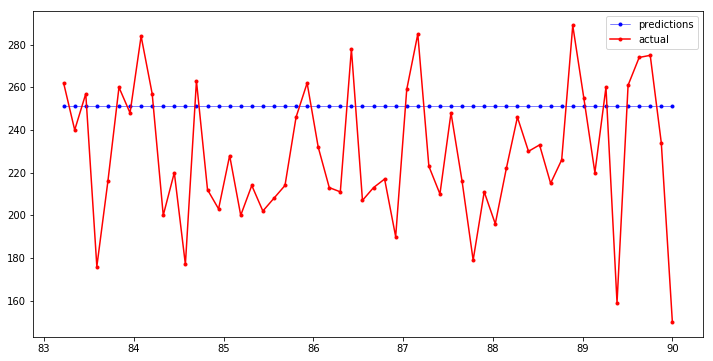

In [21]:
n_pts = len(acc_nr_bw)
t = np.linspace(0, 15 * 6, n_pts)
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(t[-len(y_test):], y_pred, 'b.-', label='predictions', lw=0.5)
ax.plot(t[-len(y_test):], y_test, 'r.-', label='actual')
ax.legend()

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_test)

1521.3971415043675

Text(0.5, 0, 'epoch')

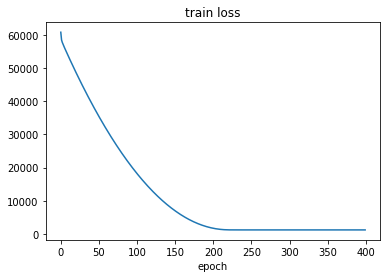

In [23]:
history = model.history
plt.title("train loss")
plt.plot( history.history["loss"] )
plt.xlabel("epoch")

In [17]:
import datetime as dt
filename = 'models/lstm_8_{}_{}'.format(dt.datetime.now().day,dt.datetime.now().minute)
# model.save(filename)

#### next try